[View in Colaboratory](https://colab.research.google.com/github/NgoDinh/Data-science/blob/master/momo_test.ipynb)

# SQL test

Query dùng để lấy dữ liệu theo yêu cầu.(query này em viếc trên nền tảng postgred sql)

In [0]:
'''
select j1.*, j2.totalservice
from
(select
    tmp1.user_id,
    max(tmp1.first_time_id) as FirstServiceid,
    max(tmp1.second_time_id) as SecondServiceid,
    to_char(max(tmp1.first_time):: DATE, 'dd-Mon-yyyy') as FirstServiceDate,
    to_char(max(tmp1.second_time):: DATE, 'dd-Mon-yyyy') as SecondServiceDate,
    max(tmp1.last_time_id) as LastServiceid,
    to_char(max(tmp1.last_time):: DATE, 'dd-Mon-yyyy') as LastServiceDate

from
    (select
        tmp.user_id,
        tmp.total_order,
        case when tmp._rank = 1 then tmp.date end as first_time,
        case when tmp._rank = 1 then tmp.serviceid end as first_time_id,
        case when tmp._rank = 2 then tmp.date end as second_time,
        case when tmp._rank = 2 then tmp.serviceid end as second_time_id,
        case when (tmp.date = tmp._rank_max) and (tmp.total_order > 2) then tmp.date end as last_time,
        case when (tmp.date = tmp._rank_max) and (tmp.total_order > 2) then tmp.serviceid  end as last_time_id
    from
        (select
            so.user_id,
            so.date,
            so.serviceid,
            rank() over (partition by so.user_id order by so.date) as _rank,
            max(so.date) over (partition by so.user_id) as _rank_max,
            count(so.serviceid) over (partition by so.user_id) as total_order
        from users so
        ) as tmp
    ) as tmp1
group by 1) as j1
inner join (select user_id, count(distinct serviceid) TotalService from users group by 1) j2 on j1.user_id = j2.user_id
'''

# Prepare data

In [0]:
import pandas as pd
df = pd.read_excel("Test_Data2.xlsx","RawData")

In [0]:
users_info = []
for user in users:
    tmp = []
    tmp.append(user)
    data = df[df['User_id']==user]
    first_time = data.Date.min()
    last_time = data.Date.max()
    tmp.append((last_time - first_time).days)
    serviceids = list(set(data.Serviceid))
    tmp.append(serviceids)
    users_info.append(tmp)

In [0]:
df_2 = pd.DataFrame(users_info, columns = ["ID","momo_age", "services"])
list_age = list(set(df_2.momo_age))
list_age.sort()

# Analysis Test - Question 1

In [0]:
result = []
unique_services = []
for age in list_age:
    tmp = []
    for data in df_2[df_2['momo_age'] == age].services:
        for service in data:
            if service not in unique_services:
                unique_services.append(service)
    tmp.append(age)
    tmp.append(len(unique_services))
    tmp.append(list(unique_services))
    #print(unique_services)
    result.append(tmp)

In [0]:
df_3 = pd.DataFrame(result, columns = ['momo_age', 'cum_unique_services', 'unique_services'])

Text(0.5,1,'Momo_age vs services')

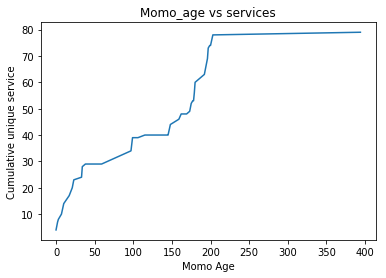

In [0]:
# view our data
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df_3.momo_age, df_3.cum_unique_services)
plt.xlabel("Momo Age")
plt.ylabel("Cumulative unique service")
plt.title("Momo_age vs services")

### Một số nhận xét
- Chúng ta có thể thấy khách hàng của momo đang chia làm 4 phân khúc theo số ngày sử dụng(momo age):
    + Đầu tiên khách hàng có momo age bé hơn 50: đây là những khách hàng mới nên có thể thấy số lượng dịch vụ mà họ sử dụng tăng khá nhanh( có thể họ đang thử các dịch vụ của momo)
    + Những khách hàng có momo age từ 50 đến 150: Trong giai đoạn này thì số lượng dịch vụ mà họ sử dụng bắt đầu chững lại.
    + Sau đó thì sỗ lượng dịch vụ lại tăng mạnh với momo age từ 150 đến 200.
    + Cuối cùng trên 200 thì đây là giai đoạn ổn định khi đa phần họ đã sử dụng hết các dịch vụ mà momo cung cấp.
    
- Như vậy chúng ta có thể thấy giai đoạn 0-50 và giai đoạn 150-200 chúng ta có thể gọi là giai đoạn quảng cáo ( khi chúng ta thu hút khách hàng, và khuyến khích họ trải nghiệm các dịch vụ mà momo cung cấp). Trong khi đó giai đoạn 50-150 và lớn hơn 200 là giai đoạn chăm sóc: với giai đoạn này ta nên tập trung vào yếu tố trải nghiệm của khách hàng để làm cho họ ở lại và tiếp tục trải nghiệm(50-150) và biến họ thành khách hàng trung thành(lớn hơn 200).

- Chúng ta sẽ tiếp tục đào sâu vào mỗi giai đoạn để xem dịch vụ mà họ thường dùng là gì.

In [0]:
df_3

,momo_age,cum_unique_services,unique_services
0,0,4,"[20, 1136, 1014, 981]"
1,2,7,"[20, 1136, 1014, 981, 667, 742, 487]"
2,3,8,"[20, 1136, 1014, 981, 667, 742, 487, 19]"
3,7,10,"[20, 1136, 1014, 981, 667, 742, 487, 19, 18, 398]"
4,10,14,"[20, 1136, 1014, 981, 667, 742, 487, 19, 18, 3..."
5,17,17,"[20, 1136, 1014, 981, 667, 742, 487, 19, 18, 3..."
6,21,20,"[20, 1136, 1014, 981, 667, 742, 487, 19, 18, 3..."
7,23,23,"[20, 1136, 1014, 981, 667, 742, 487, 19, 18, 3..."
8,33,24,"[20, 1136, 1014, 981, 667, 742, 487, 19, 18, 3..."
9,34,28,"[20, 1136, 1014, 981, 667, 742, 487, 19, 18, 3..."


In [0]:
group1 = df_3[df_3['momo_age'] == 44].unique_services.values[0]

group2_services = df_3[df_3['momo_age'] == 148].unique_services.values[0]
group2 = [i for i in group2_services if i not in group1]

group3_services = df_3[df_3['momo_age'] == 200].unique_services.values[0]
group3 = [i for i in group3_services if i not in group2_services]

group4_services = df_3[df_3['momo_age'] == 394].unique_services.values[0]
group4 = [i for i in group4_services if i not in group3_services]

In [0]:
for i in group1:
    total = 0
    for service in df_2[df_2.momo_age <= 44].services:
        if i in service:
            total = total + 1
    if total >=5:
        print(i, end=" ")

1014 981 487 

In [0]:
for i in group2_services:
    total = 0
    for service in df_2[(df_2.momo_age > 44)&(df_2.momo_age <= 148)].services:
        if i in service:
            total = total + 1
    if total >=5:
        print(i, end=" ")

1014 981 271 

In [0]:
for i in group3_services:
    total = 0
    for service in df_2[(df_2.momo_age > 148)&(df_2.momo_age <= 200)].services:
        if i in service:
            total = total + 1
    if total >=5:
        print(i, end=" ")

20 1014 981 667 270 983 268 333 1366 271 982 

In [0]:
for i in group1:
    total = 0
    for service in df_2[df_2.momo_age > 200].services:
        if i in service:
            total = total + 1
    if total >=4:
        print(i, end=" ")

1014 981 271 

Như chúng ta có thể thấy:
- Nhóm thứ nhất (momo age < 50): Dù người dùng sử dụng khá nhiều dịch vụ, tuy nhiên những dịch vụ được nhiều người sử dụng nhất đó là: 1014, 981, 487
- Nhóm thứ 2 ( momo age trong khoảng từ 50 đến 150): Như ta đã phân tích ở trên thì số lượng dịch vụ mà người dùng sử dụng thêm không nhiều, họ vẫn dùng các dịch vụ quen thuộc là 1014 và 981 bên cạnh đó họ sử dụng thêm dịch vụ 271 ( dịch vụ này không được sử dụng nhiều với những người có momo age < 50).
- Nhóm thứ 3 (momo age trong khoảng 150 đến 200): Vẫn là những dịch vụ quen thuộc là: 1014, 981, 271. Cộng thêm hàng loạt dịch vụ khác được người dùng ưa thích có thể kể đến là: 20, 667, 270, 983, 263, 333, 1366, 982 ( những dịch vụ này cũng không được dùng thường xuyên bởi 2 nhóm khách hàng 1 và 2).
- Và nhóm khách hàng thứ 4: Có vẽ như sau một thời gian tìm hiểu thì nhóm này lại trở về với dịc vụ cơ bản là: 1014, 981, 271

Có thể thấy rằng những dich vụ được mọi đối tượng yêu thích là 1014, 981 và 271

# Analysis Test - Question 2

- Dựa vào những gì mà chúng ta đã phân tích ở trên, chúng ta sẽ recommend cho khách hàng dựa theo những dịch vụ mà khách hàng khác trong cùng nhóm thường xuyên sử dụng. Tùy theo mỗi nhóm khách hàng chúng ta sẽ có những recommend phù hợp, tuy nhiên luôn phải chú trọng 3 dịch vụ được yêu thích của chúng ta là 1014, 981, 271.

Đối với khách hàng nhóm 1:

In [0]:
for i in group1:
    print(i, end=" ")

20 1136 1014 981 667 742 487 19 18 398 984 666 269 326 299 270 983 65 946 658 268 333 47 1366 481 12 285 271 11 

Đối với khách hàng thuộc nhóm 2 (đây là những dịch vụ được các khách hàng khác trong nhóm 2 sử dụng nhưng không xuất hiện trong khách hàng nhóm 1):

In [0]:
for i in group2:
    print(i, end=" ")

355 263 904 273 985 456 13 1166 54 982 3976 66 1346 68 70 

Đối với khách hàng thuộc nhóm 3 (đây là những dịch vụ được các khách hàng khác trong nhóm 3 sử dụng nhưng không xuất hiện trong khách hàng nhóm 1, 2):

In [0]:
for i in group3:
    print(i, end=" ")

64 310 650 3998 257 308 279 1086 10 259 327 905 330 659 23 316 4 486 24 1046 309 56 82 91 125 1186 3995 363 4095 63 

Đối với khách hàng thuộc nhóm 4 (đây là những dịch vụ được các khách hàng khác trong nhóm 4 sử dụng nhưng không xuất hiện trong khách hàng nhóm 1, 2, 3):

In [0]:
for i in group4:
    print(i, end=" ")

4483 261 668 55 2 

### Trên đây là toàn bộ những phân tích của em dựa theo dữ liệu được các anh chị cung cấp, em rất mong nhận được sự góp ý từ phía các anh chị để em có thể hoàn thiện thêm, em cám ơn rất nhiều, chúc các anh chị có một ngày làm việc vui vẻ.